# Objective:

The goals / steps of this project are the following:

* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
* Apply a distortion correction to raw images.
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view").
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.


### Directory setup
The images for camera calibration are stored in the dir `./camera_cal`.  The images in `./test_images` are for testing pipeline on single frames, extracted from the videos using `cv2.imwrite()`.

The output from each stage of pipeline is saved in the folder called `./ouput_images`. 

We will try the lane finding on 3 different videos with increasing difficulty:

    1) easy:   `project_video.mp4` 
    2) medium: `challenge_video.mp4` 
    3) hard:   `harder_challenge.mp4` 

In the end, we will test ambitiousness by going out and taking videos, calibrating camera and demonstrating robustness of this implementation!

In [6]:
import numpy as np
import os
import cv2
import glob
import matplotlib.pyplot as plt


import matplotlib.image as mpimg
#%matplotlib qt
%matplotlib inline

In [5]:
# define dir
camera_cal_dir = './camera_cal'
output_dir = './ouput_images'
test_dir = './test_images'

### First, let's compute the camera calibration using chessboard images

In [11]:


# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# Make a list of calibration images
images = glob.glob(os.path.join(camera_cal_dir, 'calibration*.jpg'))

# Step through the list and search for chessboard corners
for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (9,6),None)

    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)

        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, (9,6), corners, ret)
        cv2.imshow('img',img)
        cv2.waitKey(500)

cv2.destroyAllWindows()

In [12]:
from lane_lines_2 import thresholds
from lane_lines_2 import plotting
from lane_lines_2 import color_grad_thresh as cg

In [3]:
test_image = mpimg.imread('./img/signs_vehicles_xygrad.jpg')

In [9]:
thresh_img = thresholds.apply_thresholds(test_image, ksize=5, sobel_thresh=(40,150))

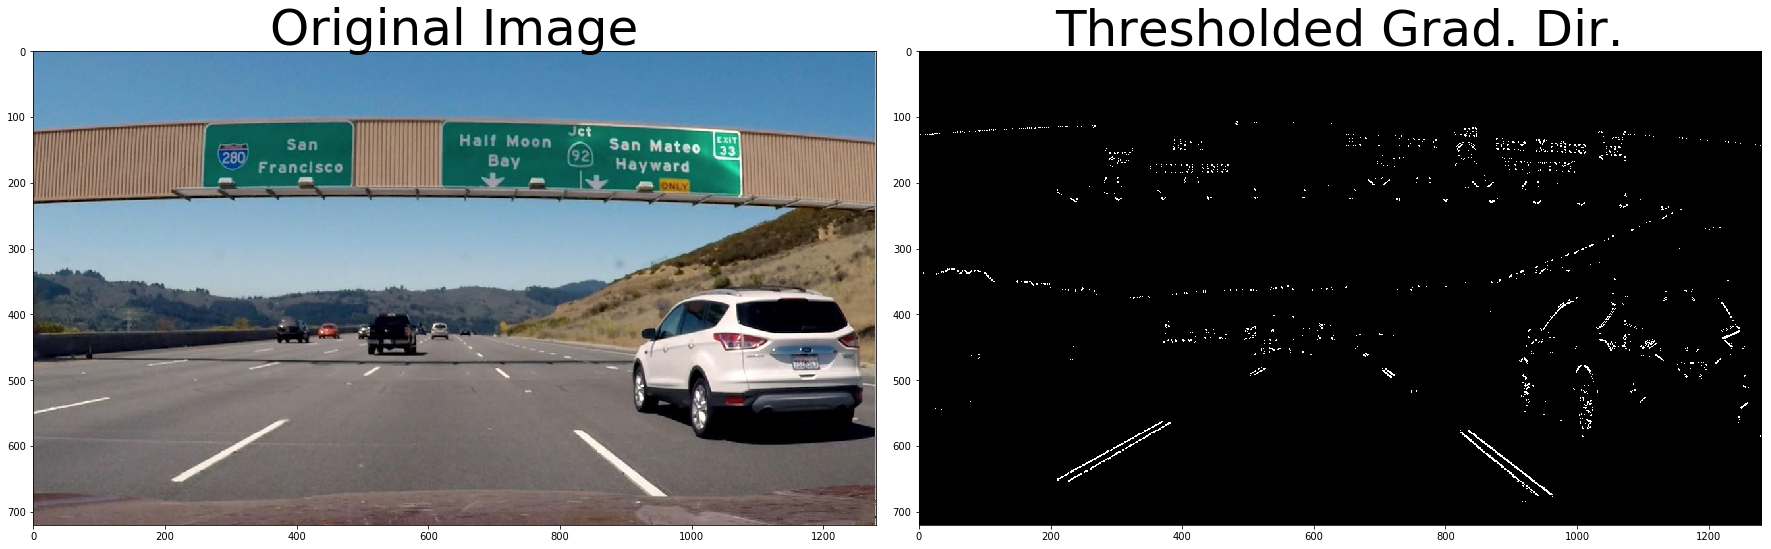

In [10]:
plotting.plot_side_by_side(test_image, thresh_img)

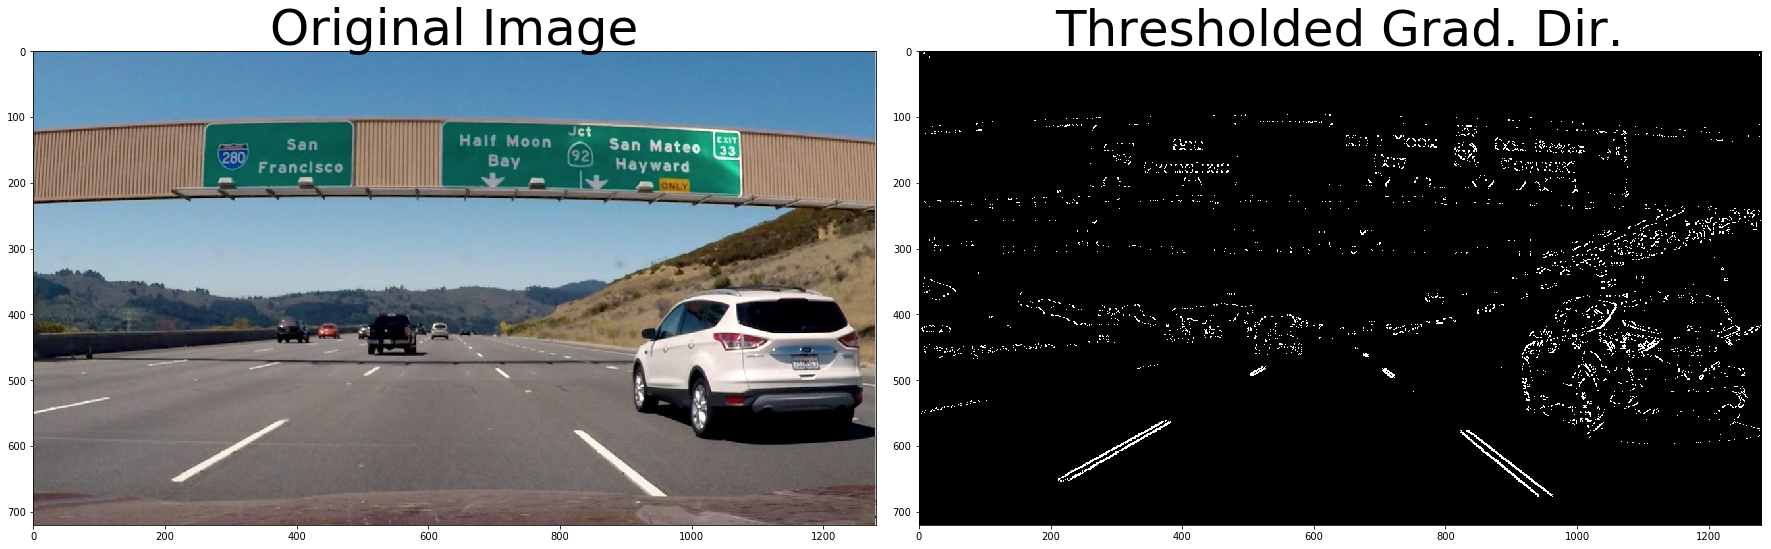

In [15]:
cg.apply_gradient_thresholds(test_image, ksize=5, sobel_thresh=(40,250), plot=True)

In [16]:
test_image = mpimg.imread('./test_images/test6.jpg')

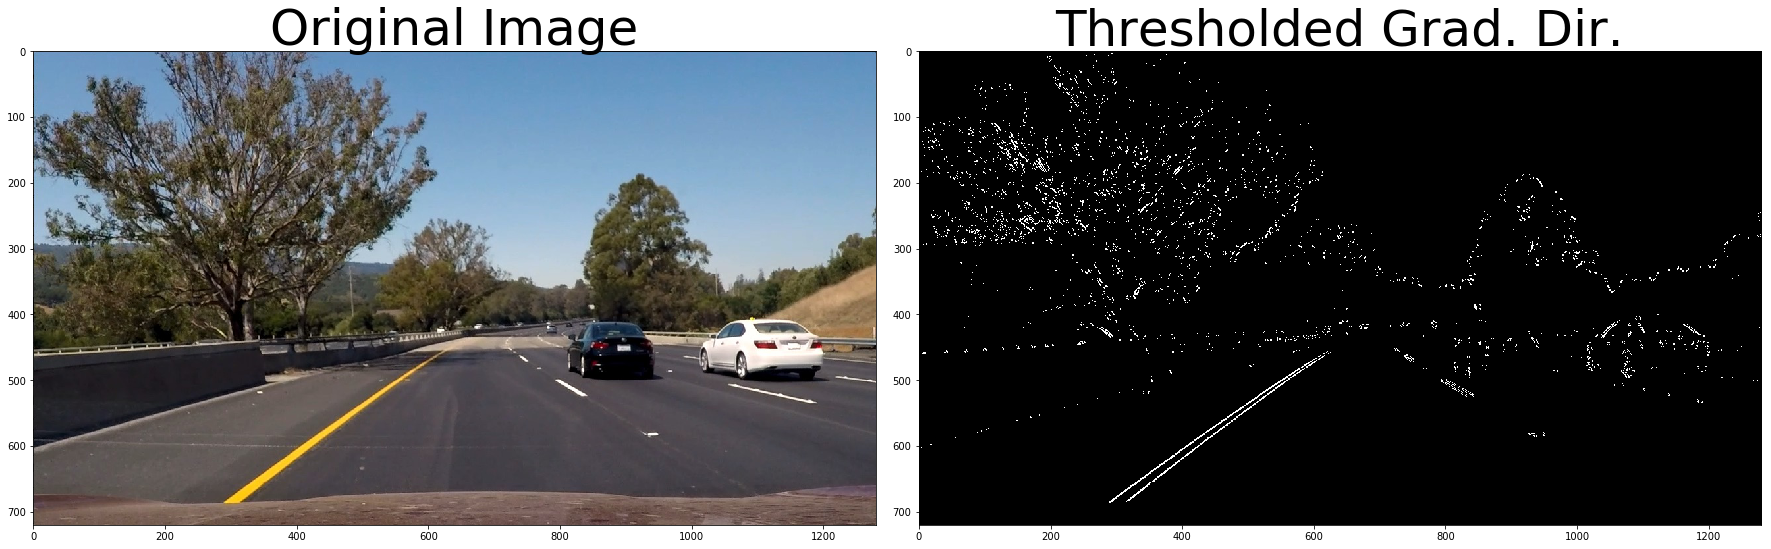

In [20]:
thresh_img =thresholds.apply_thresholds(test_image, ksize=5, sobel_thresh=(40,150))
plotting.plot_side_by_side(test_image, thresh_img)

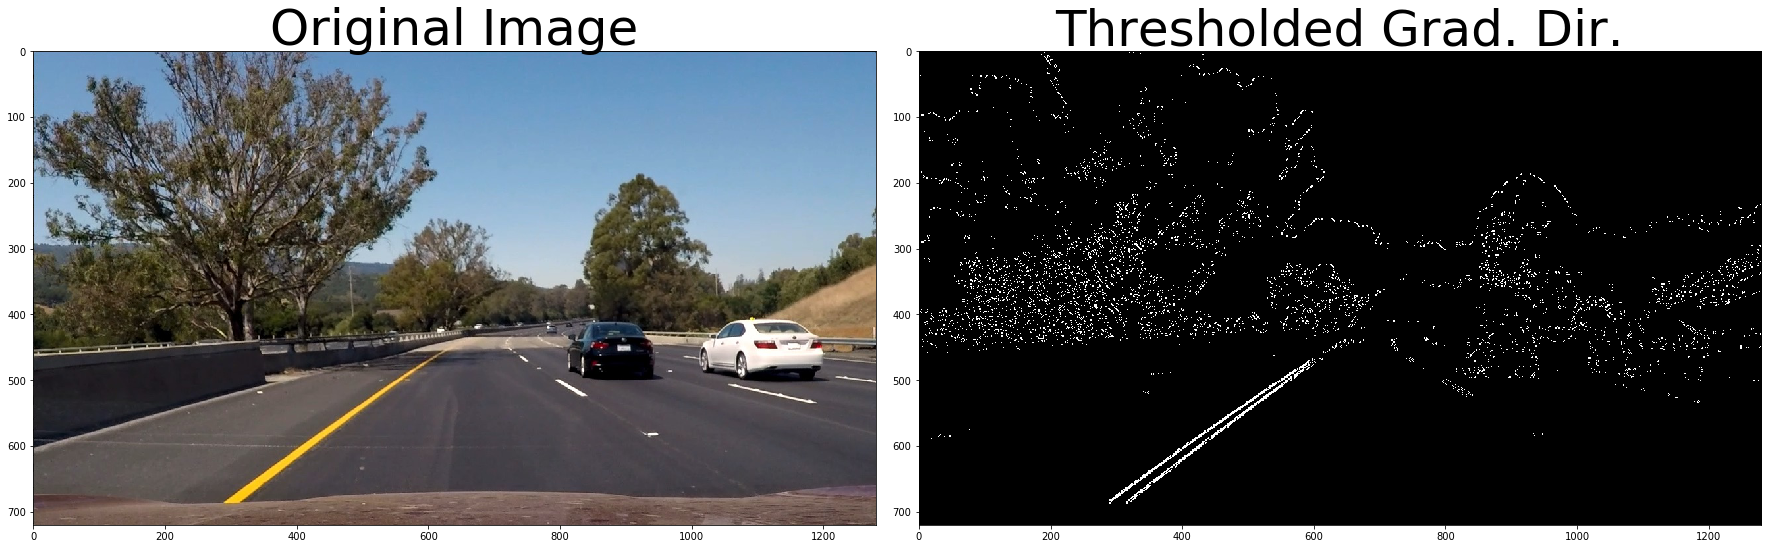

In [26]:
cg.apply_gradient_thresholds(test_image, ksize=5, sobel_thresh=(50,150), plot=True)

In [ ]:
binary = cg.apply_gradient_thresholds(test_image, ksize=5, sobel_thresh=(50,150))